<a href="https://colab.research.google.com/github/dhsingh0815/ML/blob/main/DL/DeepLearning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install tensorflow matplotlib


In [ ]:
# Import required libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [ ]:

# 1. Generate synthetic data
np.random.seed(42)  # reproducibility
X = np.random.rand(1000, 2)  # 1000 samples, 2 features each
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Label: 1 if sum > 1 else 0



X - is a 1000X2 matrix.
X[:,0] is a column matrix out of 0th column, X[:,1] is again column matrix out of 1st column.
X[:, 0] + X[:, 1] - Matrix addition.
X[:, 0] + X[:, 1] > 1 - Each element of 1000X1 matrix is compared with 1, it will result in a 1000X1 matrix with values being true/false.
astype(int) - converts true/false to 1/0.
y is essentially a 1000X1 matrix with values 1 or 0

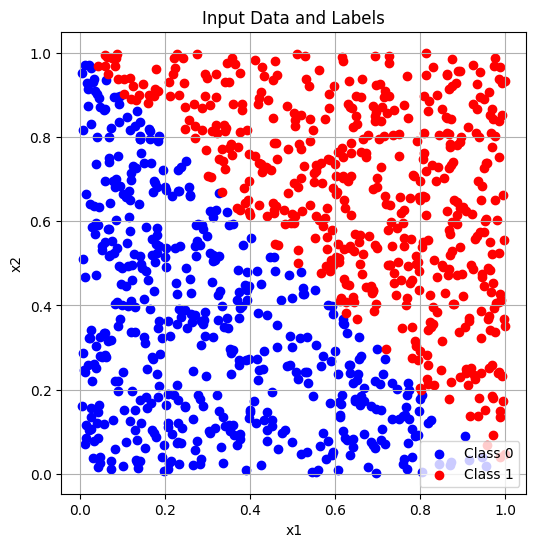

In [ ]:

# 2. Visualize the data
plt.figure(figsize=(6,6))
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue', label='Class 0')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='red', label='Class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Input Data and Labels')
plt.legend()
plt.grid(True)
plt.show()


# Couldn't understand X[y==0][:,0]?

In [ ]:

# 3. Build a simple neural network model
model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=(2,)),  # hidden layer
    # A layer with 4 Neurons , activation function is relu ,
    layers.Dense(1, activation='sigmoid')  # output layer for binary classification, 1 neuron, activation function sigmoid
])

# 4. Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ABove model has 2 layers, 1 st layer has 4 neurons, activation func relu.
2nd layer output layer has 1 neuron, activation func sigmoid to have binary output. **What is this input_shape???**
Loss fun is binary cross entropy , optimizer is Adam is Adaptive learning rate optimization algo , it updates weights for each parameter individually.
To evaluate models efficiency, metric 'accuracy' is employed.

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5364 - loss: 0.6963
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5709 - loss: 0.6790
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5834 - loss: 0.6776
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5882 - loss: 0.6698
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5901 - loss: 0.6733
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6572 - loss: 0.6589
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6733 - loss: 0.6510
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6518 - loss: 0.6523
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6730 - loss: 0.6408
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7036 - loss: 0.6249
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7018 - loss: 0.6233
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7273 - 

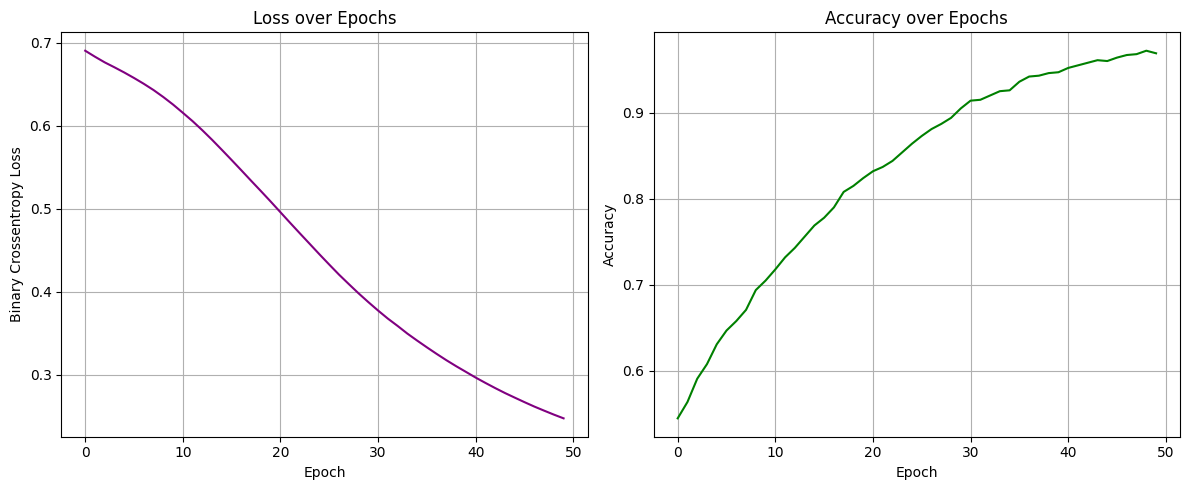

In [ ]:

# 5. Train the model
history = model.fit(X, y, epochs=50, batch_size=32, verbose=1)

# 6. Plot training loss and accuracy
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='purple')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy Loss")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='green')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()


Model is trained with training data , we have 1000 data points but here we are training with 32 datapoints at a time. For each data point, there will be 50 epoch. Verbose - level of output info generated for user

In [ ]:

# 7. Test a few predictions
test_samples = np.array([[0.1, 0.2], [0.6, 0.6], [0.4, 0.3], [0.8, 0.5]])
predictions = model.predict(test_samples)
print("Input\t\tPredicted Probability\tClass")
for i, pred in enumerate(predictions):
    #print(pred)
    print(f"{test_samples[i]}\t{pred[0]:.4f}\t\t\t{int(pred[0] > 0.5)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Input		Predicted Probability	Class
[0.1 0.2]	0.0430			0
[0.6 0.6]	0.7883			1
[0.4 0.3]	0.1914			0
[0.8 0.5]	0.8742			1


Predicted Probability - Probability of what?

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


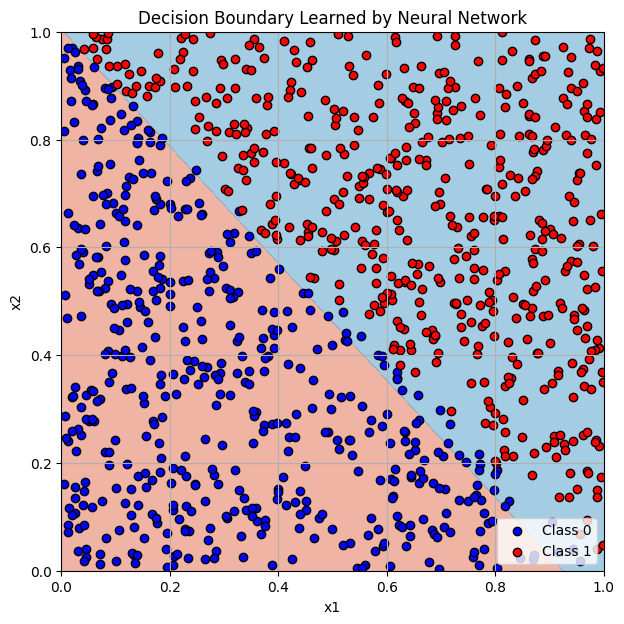

In [ ]:
# 8. Plotting the decision boundary
# Create a grid of points in the 2D input space
xx, yy = np.meshgrid(np.linspace(0, 1, 200), np.linspace(0, 1, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict on the entire grid
probs = model.predict(grid).reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(7,7))
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap='RdBu', alpha=0.6)
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue', label='Class 0', edgecolor='k')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='red', label='Class 1', edgecolor='k')
plt.title("Decision Boundary Learned by Neural Network")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()


np.linspace(0, 1, 200) - create 200 numbers between 0 and 1
np.meshgrid - creates 2 D array from input two 1-D arrays
ravel - flattens the array
np.c_ concatenates the array

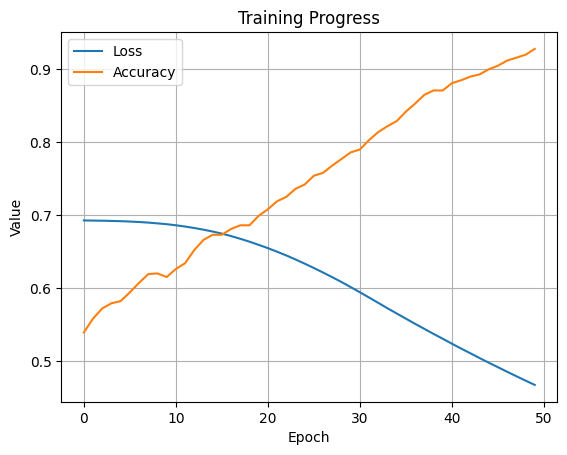

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training Progress')
plt.legend()
plt.grid(True)
plt.show()
